In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('steam-200k.csv')

In [3]:
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [4]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

151603712 :
 [151603712 187131847  59945701 ... 176449171 221315846 128470551]
62990992     1573
33865373      949
11403772      906
30246419      901
47457723      855
             ... 
89988424        1
283979950       1
121382416       1
209746499       1
198709823       1
Name: 151603712, Length: 12393, dtype: int64

 **************************************** 

The Elder Scrolls V Skyrim :
 ['The Elder Scrolls V Skyrim' 'Fallout 4' 'Spore' ... 'Space Colony'
 'Life is Hard' 'Executive Assault']
Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
                                   ... 
Putt-Putt Joins the Parade            1
Ducati World Championship             1
Chunk of Change Knight                1
STASIS                                1
Soccertron                            1
Name: The Elder Scrolls V Skyrim, Length: 5155, dtype: in

In [5]:
df.describe()

,151603712,1.0,0
count,1.999990e+05,199999.000000,199999.0
mean,1.036556e+08,17.874468,0.0
std,7.208084e+07,138.057292,0.0
min,5.250000e+03,0.100000,0.0
25%,4.738420e+07,1.000000,0.0
50%,8.691201e+07,1.000000,0.0
75%,1.542309e+08,1.300000,0.0
max,3.099031e+08,11754.000000,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   151603712                   199999 non-null  int64  
 1   The Elder Scrolls V Skyrim  199999 non-null  object 
 2   purchase                    199999 non-null  object 
 3   1.0                         199999 non-null  float64
 4   0                           199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [9]:
# Are there any missing values?
df.isna().sum()

151603712                     0
The Elder Scrolls V Skyrim    0
purchase                      0
1.0                           0
0                             0
dtype: int64

In [10]:
df.drop(['0'],axis = 1,inplace = True)

### Exploratory Data Analysis

In [12]:
df['purchase'].unique()

array(['play', 'purchase'], dtype=object)

In [13]:
df['purchase'].value_counts()

purchase    129510
play         70489
Name: purchase, dtype: int64

<AxesSubplot:xlabel='purchase', ylabel='count'>

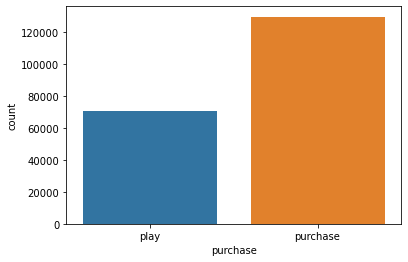

In [14]:
sns.countplot(x="purchase", data=df)

<AxesSubplot:ylabel='purchase'>

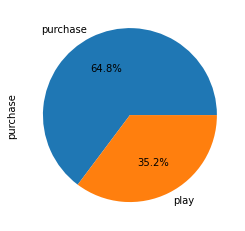

In [15]:
df['purchase'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [16]:
df.corr()

,151603712,1.0
151603712,1.000000,0.004553
1.0,0.004553,1.000000


(2.5, -0.5)

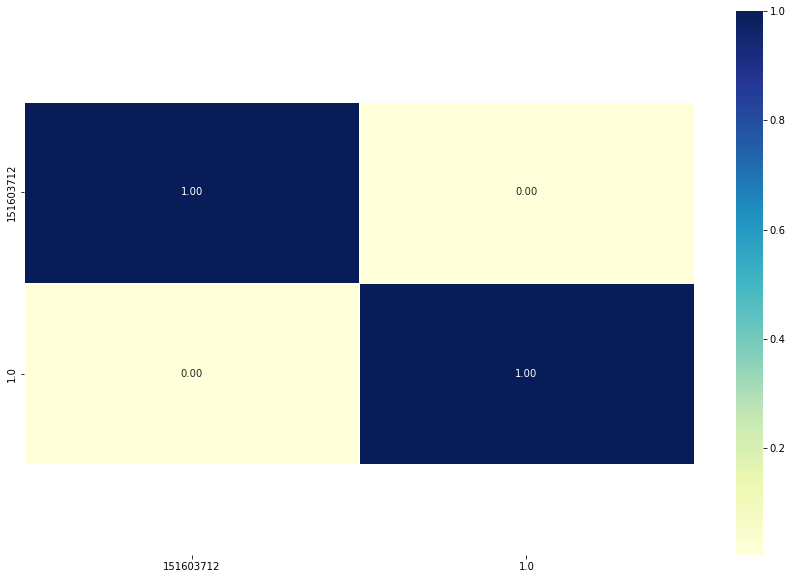

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Recommendation Engine

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['The Elder Scrolls V Skyrim'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(199999, 4899)

In [22]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

MemoryError: Unable to allocate 298. GiB for an array with shape (199999, 199999) and data type float64